In [ ]:
import cv2
import numpy as np
import zipfile
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from google.colab import drive
import xml.etree.ElementTree as ET


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/car_img-test.zip' -d car_train
!unzip '/content/drive/MyDrive/car_img-validation.zip' -d car_validation
!unzip '/content/drive/MyDrive/plate_image_with_dummy-train.zip' -d plate_train

Streaming output truncated to the last 5000 lines.
  inflating: plate_train/train/dummy_te_14501.jpg  
  inflating: plate_train/train/dummy_te_14501.xml  
  inflating: plate_train/train/dummy_te_14502.jpg  
  inflating: plate_train/train/dummy_te_14502.xml  
  inflating: plate_train/train/dummy_te_14503.jpg  
  inflating: plate_train/train/dummy_te_14503.xml  
  inflating: plate_train/train/dummy_te_14504.jpg  
  inflating: plate_train/train/dummy_te_14504.xml  
  inflating: plate_train/train/dummy_te_14505.jpg  
  inflating: plate_train/train/dummy_te_14505.xml  
  inflating: plate_train/train/dummy_te_14506.jpg  
  inflating: plate_train/train/dummy_te_14506.xml  
  inflating: plate_train/train/dummy_te_14507.jpg  
  inflating: plate_train/train/dummy_te_14507.xml  
  inflating: plate_train/train/dummy_te_14508.jpg  
  inflating: plate_train/train/dummy_te_14508.xml  
  inflating: plate_train/train/dummy_te_14509.jpg  
  inflating: plate_train/train/dummy_te_14509.xml  
  inflating: 

In [ ]:
def folder_organizer(folder_path):
    # Define target directory
    images_dir = os.path.join(folder_path, "images")
    labels_dir = os.path.join(folder_path, "labels")

    # Create folders if don't exist
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    for file_name in os.listdir(folder_path):
        if file_name in ("images", "labels"):
            continue

        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            lower_name = file_name.lower()
            if lower_name.endswith(('.jpg')):
                try:
                    shutil.move(file_path, os.path.join(images_dir, file_name))
                except Exception as e:
                    print(f"Image transfer error {file_name}: {e}")
            elif lower_name.endswith('.xml'):
                try:
                    shutil.move(file_path, os.path.join(labels_dir, file_name))
                except Exception as e:
                    print(f"XML transfer error {file_name}: {e}")

    print(f'✅ The organization successfully done at "{folder_path}".')

folder_organizer('/content/plate_train/train')
folder_organizer('/content/car_validation/validation')
folder_organizer('/content/plate_train/train')

✅ The organization successfully done at "/content/plate_train/train".
✅ The organization successfully done at "/content/car_validation/validation".
✅ The organization successfully done at "/content/plate_train/train".


In [ ]:
def count_files(folder):
    print(f"📂 {folder}:")
    print(" images:", len(os.listdir(os.path.join(folder, "images"))))
    print(" labels:", len(os.listdir(os.path.join(folder, "labels"))))

count_files('/content/plate_train/train')
count_files('/content/car_validation/validation')
count_files('/content/plate_train/train')

📂 /content/plate_train/train:
 images: 45469
 labels: 45469
📂 /content/car_validation/validation:
 images: 2120
 labels: 2120
📂 /content/plate_train/train:
 images: 45469
 labels: 45469


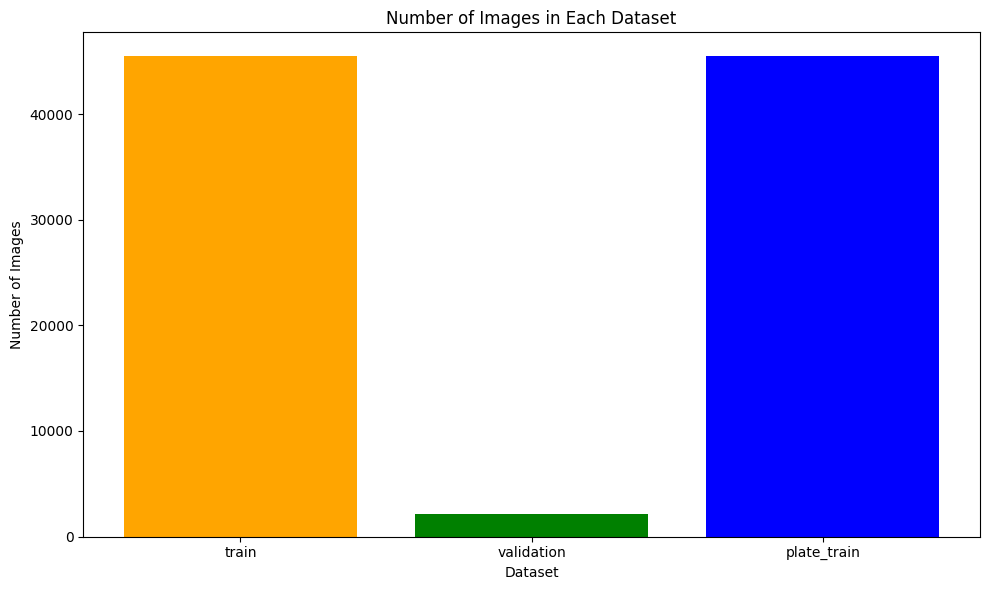

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
from collections import Counter

# Function to count the number of images in the dataset
def count_images_in_dataset(folder_path):
    images_dir = os.path.join(folder_path, 'images')
    image_files = os.listdir(images_dir)
    return len(image_files)

# Datasets for train, validation, and plate_train
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
    'plate_train': '/content/plate_train/train'
}

# Count the number of images in each dataset
image_counts = {}
for dataset_name, dataset_path in datasets.items():
    image_counts[dataset_name] = count_images_in_dataset(dataset_path)

# Plotting the image distribution for each dataset
plt.figure(figsize=(10, 6))
colors = ['orange', 'green', 'blue']

plt.bar(image_counts.keys(), image_counts.values(), color=colors)
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Dataset')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import os
import cv2

def analyze_image_diversity_for_all(datasets):
    for dataset_name, folder_path in datasets.items():
        print(f"Analyzing image diversity for dataset: {dataset_name}")
        images_dir = os.path.join(folder_path, 'images')
        image_files = os.listdir(images_dir)

        aspect_ratios = []
        brightness_values = []
        for image_file in image_files:
            image_path = os.path.join(images_dir, image_file)
            img = cv2.imread(image_path)

            # Calculate aspect ratio
            height, width, _ = img.shape
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

            # Calculate brightness (mean pixel value)
            brightness = np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
            brightness_values.append(brightness)

        print(f"  Aspect Ratio Range for {dataset_name}: {min(aspect_ratios)} - {max(aspect_ratios)}")
        print(f"  Average Brightness for {dataset_name}: {np.mean(brightness_values)}\n")

# Example: Replace with your datasets
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
    'plate_train': '/content/plate_train/train'
}
analyze_image_diversity_for_all(datasets)


Analyzing image diversity for dataset: train
  Aspect Ratio Range for train: 0.4153846153846154 - 8.172413793103448
  Average Brightness for train: 138.45024907058985

Analyzing image diversity for dataset: validation
  Aspect Ratio Range for validation: 0.43232323232323233 - 4.516666666666667
  Average Brightness for validation: 107.31645663015779

Analyzing image diversity for dataset: plate_train
  Aspect Ratio Range for plate_train: 0.4153846153846154 - 8.172413793103448
  Average Brightness for plate_train: 138.45024907058985



In [ ]:
import xml.etree.ElementTree as ET
import os

def analyze_label_quality_for_all(datasets):
    for dataset_name, folder_path in datasets.items():
        print(f"Analyzing label quality for dataset: {dataset_name}")
        labels_dir = os.path.join(folder_path, 'labels')
        label_files = os.listdir(labels_dir)

        invalid_labels = 0
        total_labels = len(label_files)

        for label_file in label_files:
            label_path = os.path.join(labels_dir, label_file)
            try:
                tree = ET.parse(label_path)
                root = tree.getroot()
                # Check for missing or incorrect 'name' or 'bndbox' tags
                for obj in root.findall('.//object'):
                    if obj.find('name') is None or obj.find('bndbox') is None:
                        invalid_labels += 1
            except ET.ParseError as e:
                print(f"Error parsing {label_file}: {e}")
                continue

        invalid_percentage = (invalid_labels / total_labels) * 100
        print(f"  Percentage of invalid labels for {dataset_name}: {invalid_percentage}%\n")

# Example: Replace with your datasets
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
    'plate_train': '/content/plate_train/train'
}
analyze_label_quality_for_all(datasets)

Analyzing label quality for dataset: train
  Percentage of invalid labels for train: 0.0%

Analyzing label quality for dataset: validation
  Percentage of invalid labels for validation: 0.0%

Analyzing label quality for dataset: plate_train
  Percentage of invalid labels for plate_train: 0.0%



Analyzing class distribution for dataset: train
  Class Distribution for train: {'9': 33323, '3': 32348, 'ه': 1000, '5': 32023, '4': 33147, '1': 37175, '0': 12733, '2': 34180, 'م': 2536, '8': 34144, 'ش': 1001, '6': 33913, '7': 32513, 'ن': 1154, 'ت': 1646, 'تشریفات': 1000, 'س': 2378, 'ق': 2586, 'ی': 2066, 'د': 2790, 'ب': 2508, 'ز': 1001, 'ف': 1000, 'ط': 2365, 'الف': 1054, 'و': 2430, 'ص': 2730, 'S': 1000, 'ج': 2487, 'D': 1000, 'ث': 1001, 'ل': 2214, 'گ': 1000, 'پ': 1001, 'ع': 1421, 'ک': 1000, 'ه\u200d': 1155, 'ژ (معلولین و جانبازان)': 1023, 'ظ': 1}


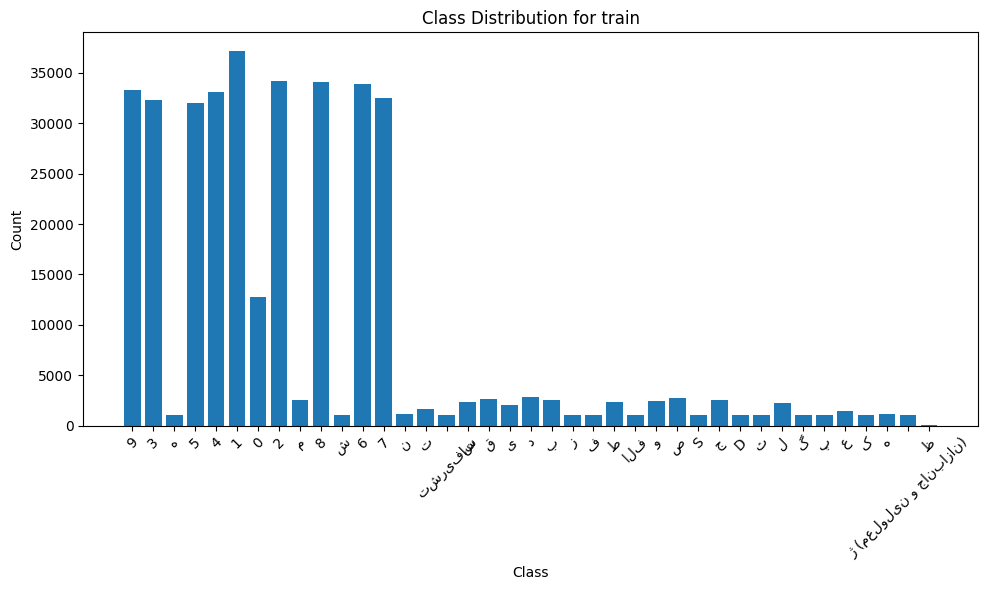

Analyzing class distribution for dataset: validation
  Class Distribution for validation: {'کل ناحیه پلاک': 2494, '3': 1700, '9': 1891, 'د': 235, '8': 1969, '6': 2034, '2': 1902, '0': 294, 'ق': 217, '7': 1710, '4': 1818, '1': 2326, 'ن': 146, '5': 1648, 'م': 202, 'ل': 156, 'ج': 197, 'ط': 179, 'ه\u200d': 156, 'و': 193, 'ب': 183, 'س': 162, 'ص': 210, 'ت': 64, 'ی': 125, 'ع': 47, 'الف': 9, 'پ': 1, 'ژ (معلولین و جانبازان)': 2, 'ظ': 1, 'ث': 1}


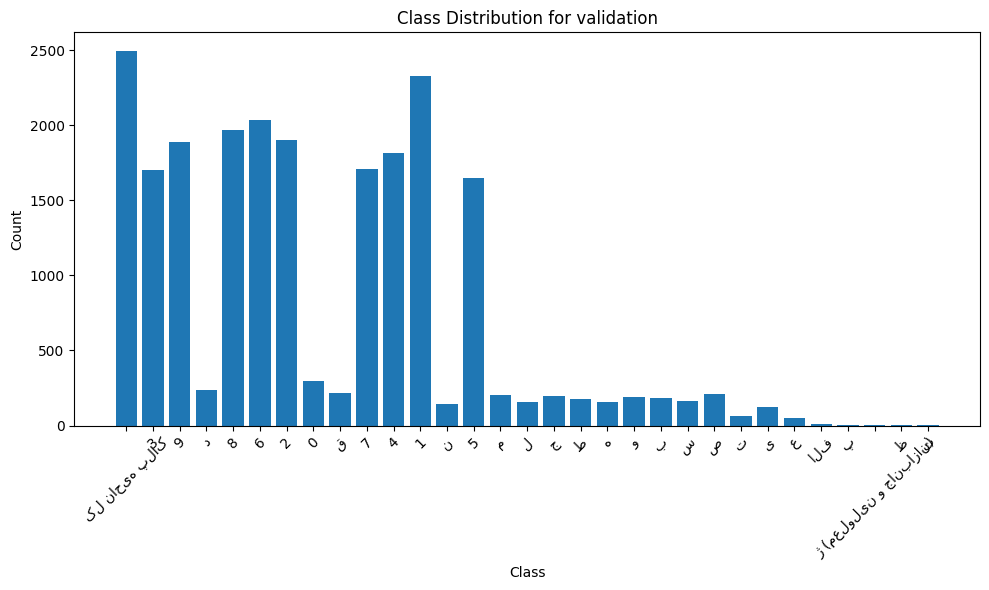

Analyzing class distribution for dataset: plate_train
  Class Distribution for plate_train: {'9': 33323, '3': 32348, 'ه': 1000, '5': 32023, '4': 33147, '1': 37175, '0': 12733, '2': 34180, 'م': 2536, '8': 34144, 'ش': 1001, '6': 33913, '7': 32513, 'ن': 1154, 'ت': 1646, 'تشریفات': 1000, 'س': 2378, 'ق': 2586, 'ی': 2066, 'د': 2790, 'ب': 2508, 'ز': 1001, 'ف': 1000, 'ط': 2365, 'الف': 1054, 'و': 2430, 'ص': 2730, 'S': 1000, 'ج': 2487, 'D': 1000, 'ث': 1001, 'ل': 2214, 'گ': 1000, 'پ': 1001, 'ع': 1421, 'ک': 1000, 'ه\u200d': 1155, 'ژ (معلولین و جانبازان)': 1023, 'ظ': 1}


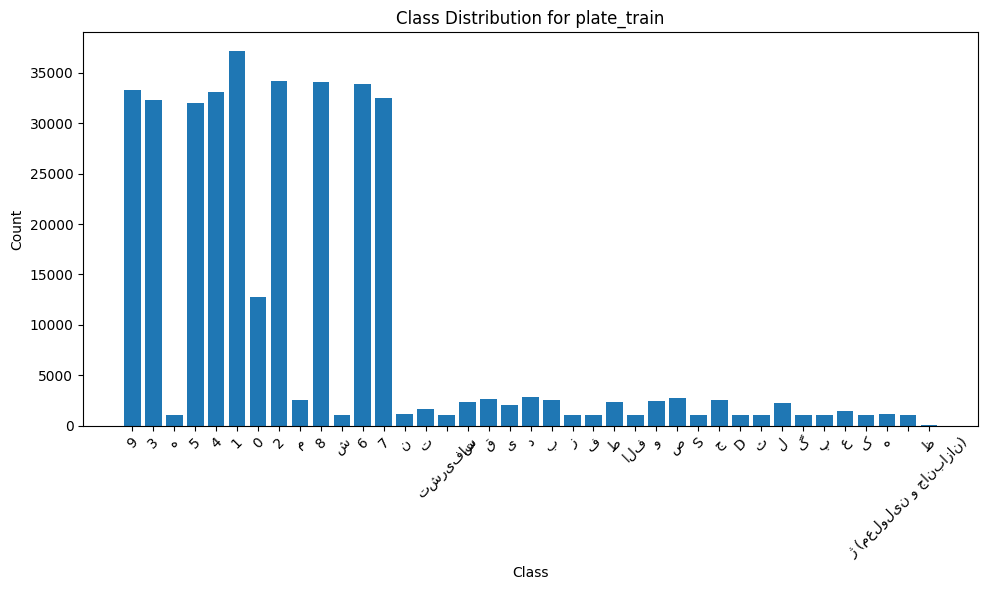

In [ ]:
import xml.etree.ElementTree as ET
from collections import Counter
import matplotlib.pyplot as plt

def analyze_class_distribution_for_all(datasets):
    for dataset_name, folder_path in datasets.items():
        print(f"Analyzing class distribution for dataset: {dataset_name}")
        labels_dir = os.path.join(folder_path, 'labels')
        label_files = os.listdir(labels_dir)

        class_counter = Counter()

        for label_file in label_files:
            label_path = os.path.join(labels_dir, label_file)
            try:
                tree = ET.parse(label_path)
                root = tree.getroot()
                for obj in root.findall('.//object'):
                    class_name = obj.find('name').text
                    class_counter[class_name] += 1
            except ET.ParseError as e:
                print(f"Error parsing {label_file}: {e}")
                continue

        print(f"  Class Distribution for {dataset_name}: {dict(class_counter)}")

        # Plot class distribution
        plt.figure(figsize=(10, 6))
        plt.bar(class_counter.keys(), class_counter.values())
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title(f'Class Distribution for {dataset_name}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example: Replace with your datasets
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
    'plate_train': '/content/plate_train/train'
}
analyze_class_distribution_for_all(datasets)


In [ ]:
import os
import datetime

def analyze_time_of_day_for_all(datasets):
    for dataset_name, folder_path in datasets.items():
        print(f"Analyzing time of day for dataset: {dataset_name}")
        images_dir = os.path.join(folder_path, 'images')
        image_files = os.listdir(images_dir)

        night_count = 0
        day_count = 0

        for image_file in image_files:
            img_path = os.path.join(images_dir, image_file)

            # Check the timestamp of the image file
            timestamp = os.path.getmtime(img_path)
            image_time = datetime.datetime.fromtimestamp(timestamp).hour

            # Classify as day or night based on the hour
            if 6 <= image_time < 18:
                day_count += 1
            else:
                night_count += 1

        total_images = len(image_files)
        print(f"  Day images for {dataset_name}: {day_count} ({(day_count / total_images) * 100}%)")
        print(f"  Night images for {dataset_name}: {night_count} ({(night_count / total_images) * 100}%)\n")

# Example: Replace with your datasets
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
    'plate_train': '/content/plate_train/train'
}
analyze_time_of_day_for_all(datasets)


Analyzing time of day for dataset: train
  Day images for train: 45469 (100.0%)
  Night images for train: 0 (0.0%)

Analyzing time of day for dataset: validation
  Day images for validation: 2119 (99.95283018867924%)
  Night images for validation: 1 (0.04716981132075472%)

Analyzing time of day for dataset: plate_train
  Day images for plate_train: 45469 (100.0%)
  Night images for plate_train: 0 (0.0%)



Analyzing time of day for dataset: train
  Day images for train: 45469 (100.0%)
  Night images for train: 0 (0.0%)



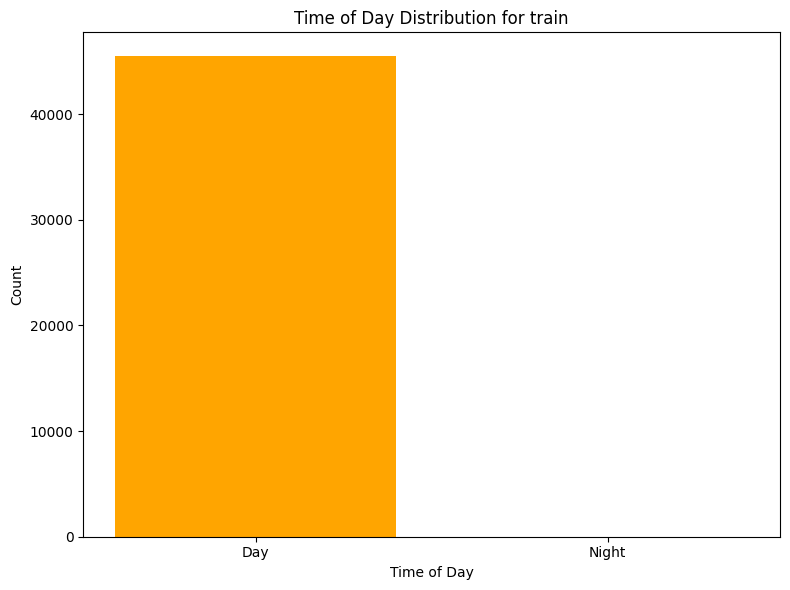

Analyzing time of day for dataset: validation
  Day images for validation: 2119 (99.95283018867924%)
  Night images for validation: 1 (0.04716981132075472%)



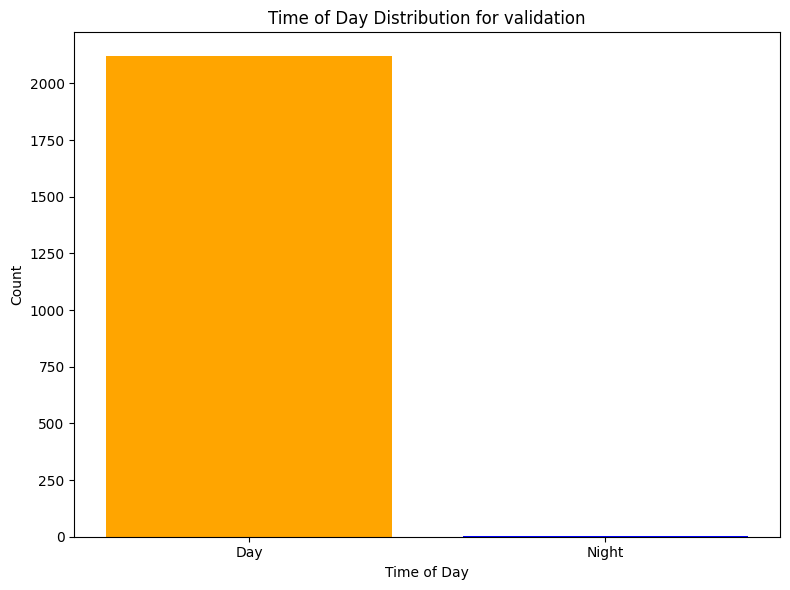

Analyzing time of day for dataset: plate_train
  Day images for plate_train: 45469 (100.0%)
  Night images for plate_train: 0 (0.0%)



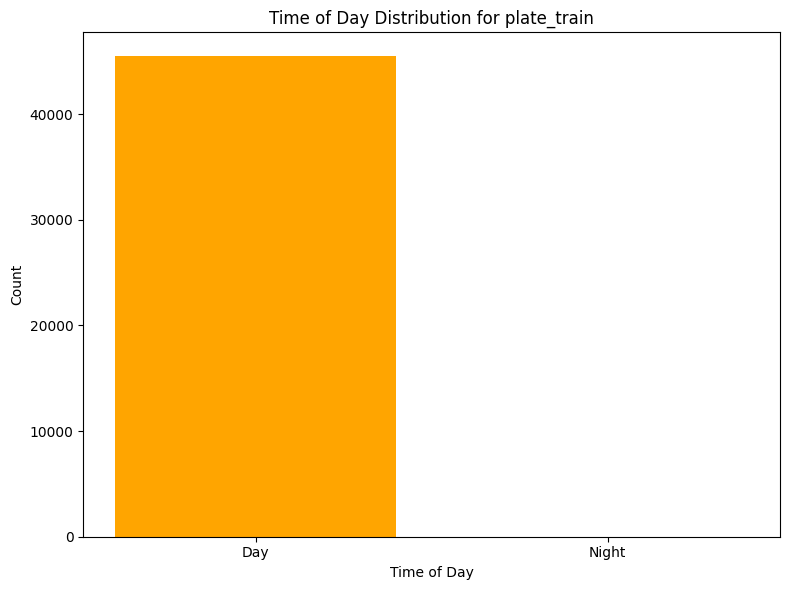

In [ ]:
import os
import datetime
import matplotlib.pyplot as plt

def analyze_time_of_day_for_all(datasets):
    for dataset_name, folder_path in datasets.items():
        print(f"Analyzing time of day for dataset: {dataset_name}")
        images_dir = os.path.join(folder_path, 'images')
        image_files = os.listdir(images_dir)

        night_count = 0
        day_count = 0

        for image_file in image_files:
            img_path = os.path.join(images_dir, image_file)

            # Check the timestamp of the image file
            timestamp = os.path.getmtime(img_path)
            image_time = datetime.datetime.fromtimestamp(timestamp).hour

            # Classify as day or night based on the hour
            if 6 <= image_time < 18:
                day_count += 1
            else:
                night_count += 1

        total_images = len(image_files)
        print(f"  Day images for {dataset_name}: {day_count} ({(day_count / total_images) * 100}%)")
        print(f"  Night images for {dataset_name}: {night_count} ({(night_count / total_images) * 100}%)\n")

        # Plot the time of day distribution
        labels = ['Day', 'Night']
        values = [day_count, night_count]

        plt.figure(figsize=(8, 6))
        plt.bar(labels, values, color=['orange', 'blue'])
        plt.xlabel('Time of Day')
        plt.ylabel('Count')
        plt.title(f'Time of Day Distribution for {dataset_name}')
        plt.tight_layout()
        plt.show()

# Example: Replace with your datasets
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
    'plate_train': '/content/plate_train/train'
}
analyze_time_of_day_for_all(datasets)


In [ ]:
import cv2
import numpy as np
import os

def analyze_brightness_for_all(datasets, threshold=100):
    for dataset_name, folder_path in datasets.items():
        print(f"Analyzing brightness for dataset: {dataset_name}")
        images_dir = os.path.join(folder_path, 'images')
        image_files = os.listdir(images_dir)

        dark_count = 0
        total_images = len(image_files)

        for image_file in image_files:
            img_path = os.path.join(images_dir, image_file)
            img = cv2.imread(img_path)

            # Convert to grayscale and calculate brightness
            grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            brightness = np.mean(grayscale)

            if brightness < threshold:
                dark_count += 1

        dark_percentage = (dark_count / total_images) * 100
        print(f"  Percentage of dark images for {dataset_name}: {dark_percentage}%\n")

# Example: Replace with your datasets
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
    'plate_train': '/content/plate_train/train'
}
analyze_brightness_for_all(datasets)


Analyzing brightness for dataset: train
  Percentage of dark images for train: 19.875079724647563%



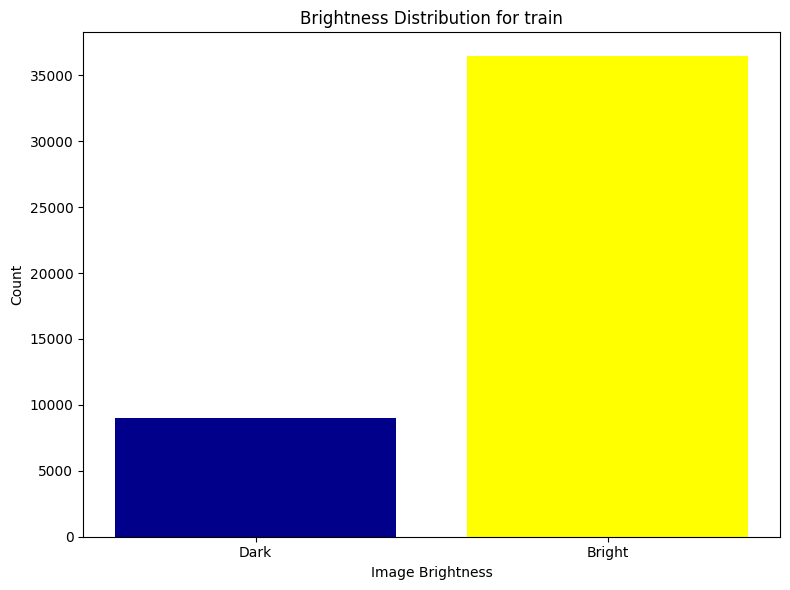

Analyzing brightness for dataset: validation
  Percentage of dark images for validation: 32.87735849056604%



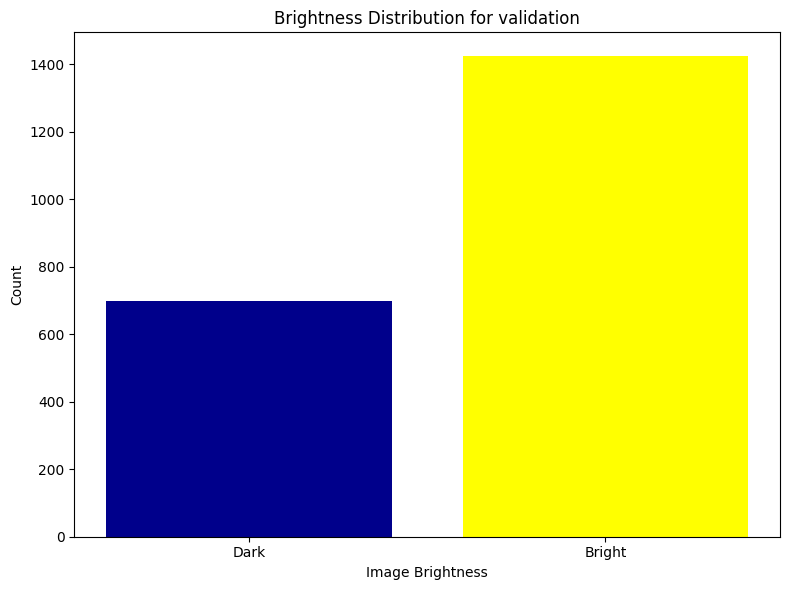

Analyzing brightness for dataset: plate_train
  Percentage of dark images for plate_train: 19.875079724647563%



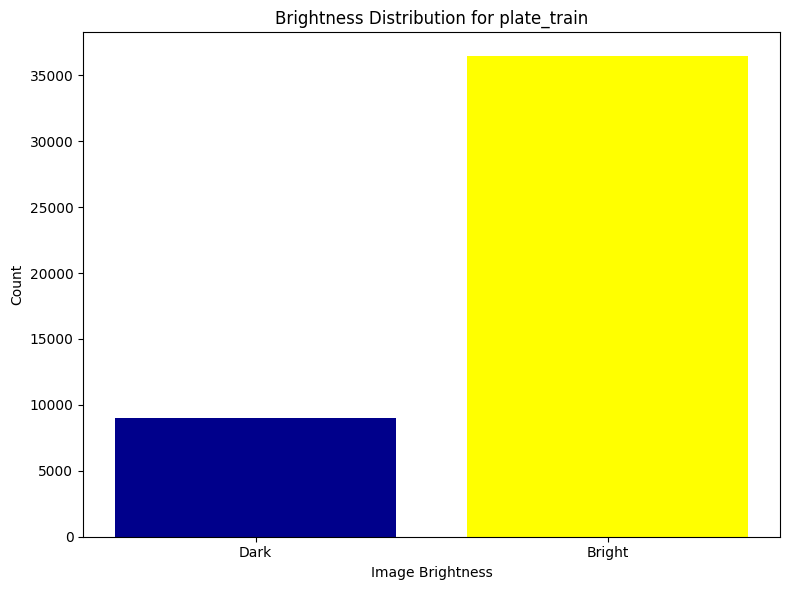

In [ ]:
def analyze_brightness_for_all(datasets, threshold=100):
    for dataset_name, folder_path in datasets.items():
        print(f"Analyzing brightness for dataset: {dataset_name}")
        images_dir = os.path.join(folder_path, 'images')
        image_files = os.listdir(images_dir)

        dark_count = 0
        total_images = len(image_files)

        for image_file in image_files:
            img_path = os.path.join(images_dir, image_file)
            img = cv2.imread(img_path)

            # Convert to grayscale and calculate brightness
            grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            brightness = np.mean(grayscale)

            if brightness < threshold:
                dark_count += 1

        dark_percentage = (dark_count / total_images) * 100
        print(f"  Percentage of dark images for {dataset_name}: {dark_percentage}%\n")

        # Plot brightness distribution (Dark vs Bright)
        labels = ['Dark', 'Bright']
        values = [dark_count, total_images - dark_count]

        plt.figure(figsize=(8, 6))
        plt.bar(labels, values, color=['darkblue', 'yellow'])
        plt.xlabel('Image Brightness')
        plt.ylabel('Count')
        plt.title(f'Brightness Distribution for {dataset_name}')
        plt.tight_layout()
        plt.show()

# Example: Replace with your datasets
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
    'plate_train': '/content/plate_train/train'
}
analyze_brightness_for_all(datasets)


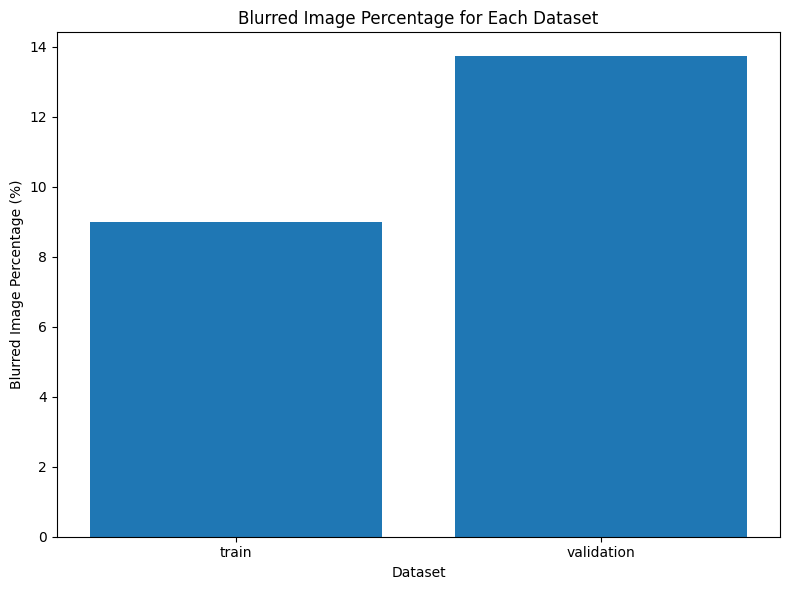

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate image sharpness (using variance of Laplacian)
def calculate_sharpness(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Laplacian operator to detect edges
    laplacian = cv2.Laplacian(img, cv2.CV_64F)

    # Calculate variance (measure of sharpness)
    variance = laplacian.var()
    return variance

# Function to count blurred images
def analyze_blurred_images(folder_path, threshold=100):
    images_dir = os.path.join(folder_path, 'images')
    image_files = os.listdir(images_dir)

    blurred_count = 0
    total_images = len(image_files)

    for image_file in image_files:
        file_path = os.path.join(images_dir, image_file)

        # Calculate sharpness of the image
        sharpness = calculate_sharpness(file_path)

        # Check if the image is blurred (if sharpness is below threshold)
        if sharpness < threshold:
            blurred_count += 1

    # Calculate percentage of blurred images
    blurred_percentage = (blurred_count / total_images) * 100
    return blurred_percentage

# Datasets for train, validation
datasets = {
    'train': '/content/plate_train/train',
    'validation': '/content/car_validation/validation',
}

# Analyze the blurred images in each dataset
blurred_data = {}

for dataset_name, dataset_path in datasets.items():
    blurred_percentage = analyze_blurred_images(dataset_path)
    blurred_data[dataset_name] = blurred_percentage

# Plotting the blurred image percentage for each dataset
plt.figure(figsize=(8, 6))
plt.bar(blurred_data.keys(), blurred_data.values())
plt.xlabel('Dataset')
plt.ylabel('Blurred Image Percentage (%)')
plt.title('Blurred Image Percentage for Each Dataset')
plt.tight_layout()
plt.show()
